## Exploration 
https://www.kaggle.com/c/tabular-playground-series-jul-2021/overview


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import shap

## SVM
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn import metrics

In [4]:
df = pd.read_csv('../data/train.csv')
print(len(df))
df.head()


7111


,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [ ]:
## Clean data

In [3]:
nan_count = df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)
nan_count


Series([], dtype: int64)

In [68]:
df.date_time = pd.to_datetime(df.date_time)
df['year'] = pd.DatetimeIndex(df['date_time']).year
df['month'] = pd.DatetimeIndex(df['date_time']).month
df['day'] = pd.DatetimeIndex(df['date_time']).day
df['hour'] = pd.DatetimeIndex(df['date_time']).hour

<AxesSubplot:xlabel='target_nitrogen_oxides', ylabel='Count'>

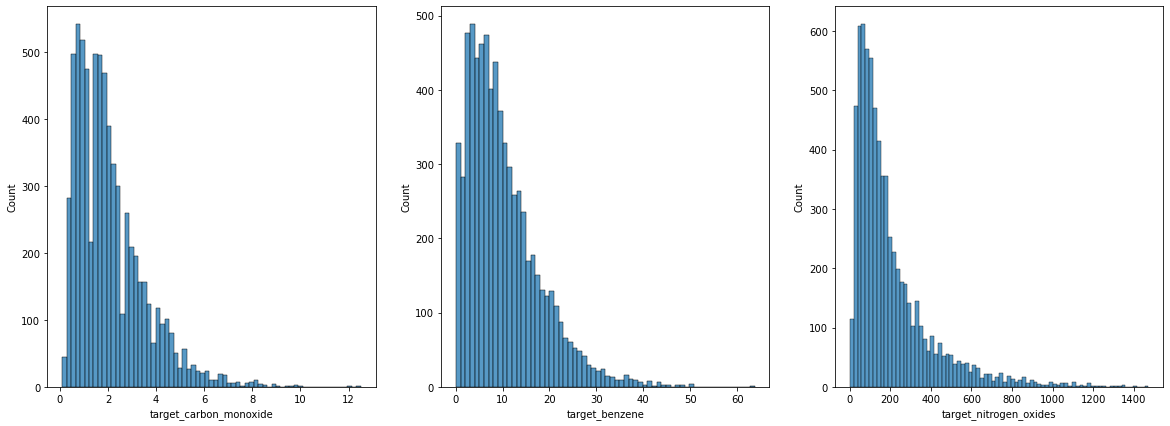

In [15]:
fig, ax =plt.subplots(1,3, figsize=(20, 7))
sns.histplot(df.target_carbon_monoxide, ax=ax[0])
sns.histplot(df.target_benzene, ax=ax[1])
sns.histplot(df.target_nitrogen_oxides, ax=ax[2])


<AxesSubplot:>

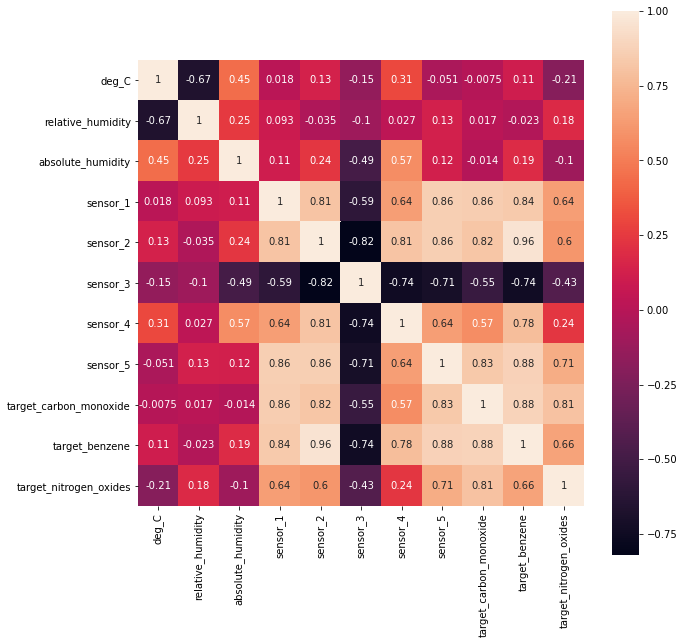

In [32]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, square=True)

In [43]:
sensors = df[['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5']]

## Regression

In [40]:
reg1 = LinearRegression().fit(sensors, df.target_benzene)
reg1.score(sensors, df.target_benzene)

0.9500746847763909

In [44]:
reg2 = LinearRegression().fit(sensors, df.target_carbon_monoxide)
reg2.score(sensors, df.target_carbon_monoxide)

0.8237278819942692

In [45]:
reg3 = LinearRegression().fit(sensors, df.target_nitrogen_oxides)
reg3.score(sensors, df.target_nitrogen_oxides)

0.6493753821722801

## Random Forest 

In [15]:
X = df.drop(['target_benzene', 'target_carbon_monoxide', 'target_nitrogen_oxides'], axis=1)

In [17]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, df.target_benzene, test_size=0.1, random_state=27)

#Grid search
rnd_reg1 = RandomForestRegressor(n_jobs=-1, random_state=27)
param_grid = { 
    'n_estimators': [2000],
    'max_leaf_nodes': [64],
    'max_features': ['auto'],
    'max_depth' : [16],
    'criterion' :['mse']
}
cv_rnd_reg = GridSearchCV(estimator=rnd_reg1, param_grid=param_grid, cv=5)
cv_rnd_reg.fit(X_train, y_train)

#Grid search result
print(cv_rnd_reg.best_params_)
y_test_pred = cv_rnd_reg.predict(X_test)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'criterion': 'mse', 'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': 64, 'n_estimators': 2000}
Root Mean Squared Error (RMSE): 1.2054803675504009


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, df.target_carbon_monoxide, test_size=0.1, random_state=27)


#Grid search
rnd_reg2 = RandomForestRegressor(n_jobs=-1, random_state=27)
param_grid = { 
    'n_estimators': [2000],
    'max_leaf_nodes': [64],
    'max_features': ['auto'],
    'max_depth' : [16],
    'criterion' :['mse']
}
cv_rnd_reg2 = GridSearchCV(estimator=rnd_reg2, param_grid=param_grid, cv=5)
cv_rnd_reg2.fit(X_train, y_train)

#Grid search result
print(cv_rnd_reg.best_params_)
y_test_pred = cv_rnd_reg2.predict(X_test)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'criterion': 'mse', 'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': 64, 'n_estimators': 2000}
Root Mean Squared Error (RMSE): 0.44970386679441954


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, df.target_nitrogen_oxides, test_size=0.1, random_state=27)


#Grid search
rnd_reg3 = RandomForestRegressor(n_jobs=-1, random_state=27)
param_grid = { 
    'n_estimators': [2000],
    'max_leaf_nodes': [64],
    'max_features': ['auto'],
    'max_depth' : [16],
    'criterion' :['mse']
}
cv_rnd_reg3 = GridSearchCV(estimator=rnd_reg3, param_grid=param_grid, cv=5)
cv_rnd_reg3.fit(X_train, y_train)

#Grid search result
print(cv_rnd_reg3.best_params_)
y_test_pred = cv_rnd_reg3.predict(X_test)
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

{'criterion': 'mse', 'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': 64, 'n_estimators': 2000}
Root Mean Squared Error (RMSE): 61.76292845318436


In [98]:
test = pd.read_csv('../data/test.csv')
test.date_time = pd.to_datetime(test.date_time)
test['year'] = pd.DatetimeIndex(test['date_time']).year
test['month'] = pd.DatetimeIndex(test['date_time']).month
test['day'] = pd.DatetimeIndex(test['date_time']).day
test['hour'] = pd.DatetimeIndex(test['date_time']).hour

In [87]:
test = test.drop('date_time', axis=1)
y_test_pred = cv_rnd_reg.predict(test)
y_test_pred2 = cv_rnd_reg2.predict(test)
y_test_pred3 = cv_rnd_reg3.predict(test)

In [110]:
test = pd.read_csv('../data/test.csv')
submission = test.date_time.copy()
submission = pd.DataFrame(submission)
submission['target_carbon_monoxide'] = pd.Series(y_test_pred2).values
submission['target_benzene'] = pd.Series(y_test_pred).values
submission['target_nitrogen_oxides'] = pd.Series(y_test_pred3).values

In [111]:
submission.to_csv('../submission.csv', index=False)

## Support Vector Regressor

In [55]:
df

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,year,month,day,hour
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,2010,3,10,18
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,2010,3,10,19
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,2010,3,10,20
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,2010,3,10,21
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,2010,3,10,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7106,9.2,32.0,0.3871,1000.5,811.2,873.0,909.0,910.5,1.3,5.1,191.1,2010,12,31,20
7107,9.1,33.2,0.3766,1022.7,790.0,951.6,912.9,903.4,1.4,5.8,221.3,2010,12,31,21
7108,9.6,34.6,0.4310,1044.4,767.3,861.9,889.2,1159.1,1.6,5.2,227.4,2010,12,31,22
7109,8.0,40.7,0.4085,952.8,691.9,908.5,917.0,1206.3,1.5,4.6,199.8,2010,12,31,23


In [59]:
# df.date_time = pd.to_datetime(df.date_time)
# df['year'] = pd.DatetimeIndex(df['date_time']).year
# df['month'] = pd.DatetimeIndex(df['date_time']).month
# df['day'] = pd.DatetimeIndex(df['date_time']).day
# df['hour'] = pd.DatetimeIndex(df['date_time']).hour
min_max_scaler_benzene = preprocessing.MinMaxScaler()
min_max_scaler_carbon = preprocessing.MinMaxScaler()
min_max_scaler_nitrogen = preprocessing.MinMaxScaler()
benzene = pd.Series(min_max_scaler_benzene.fit_transform(pd.DataFrame(df.target_benzene))[:,0])
carbon = pd.Series(min_max_scaler_carbon.fit_transform(pd.DataFrame(df.target_carbon_monoxide))[:,0])
nitrogen = pd.Series(min_max_scaler_nitrogen.fit_transform(pd.DataFrame(df.target_nitrogen_oxides))[:,0])

X = df.drop(['target_benzene', 'target_carbon_monoxide', 'target_nitrogen_oxides'], axis=1)
min_max_scaler1 = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler1.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X, benzene, test_size=0.1, random_state=27)

# min_max_scaler1 = preprocessing.MinMaxScaler()
# X_train = pd.DataFrame(min_max_scaler1.fit_transform(X_train))
# X_test = pd.DataFrame(min_max_scaler1.fit_transform(X_test))
# y_train = min_max_scaler1.fit_transform(pd.DataFrame(y_train))[:,0]
# y_test = min_max_scaler1.fit_transform(pd.DataFrame(y_test))[:,0]

0       0.187107
1       0.154088
2       0.143082
3       0.150943
4       0.099057
          ...   
7106    0.078616
7107    0.089623
7108    0.080189
7109    0.070755
7110    0.062893
Length: 7111, dtype: float64


In [60]:
svm_lin_reg1 = SVR(kernel="linear", C=100, epsilon=0.1)
svm_lin_reg1.fit(X_train, y_train)
y_pred1 = svm_lin_reg1.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Root Mean Squared Error: 0.04085744184641882


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, carbon, test_size=0.1, random_state=27)

svm_lin_reg2 = SVR(kernel="linear", C=100, epsilon=0.1)
svm_lin_reg2.fit(X_train, y_train)
y_pred2 = svm_lin_reg2.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Root Mean Squared Error: 0.052026929339340715


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, nitrogen, test_size=0.1, random_state=27)

svm_lin_reg3 = SVR(kernel="linear", C=100, epsilon=0.1)
svm_lin_reg3.fit(X_train, y_train)
y_pred3 = svm_lin_reg3.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Root Mean Squared Error: 0.06932398210592247


## For submission

In [68]:
test = pd.read_csv('../data/test.csv')
test.date_time = pd.to_datetime(test.date_time)
test['year'] = pd.DatetimeIndex(test['date_time']).year
test['month'] = pd.DatetimeIndex(test['date_time']).month
test['day'] = pd.DatetimeIndex(test['date_time']).day
test['hour'] = pd.DatetimeIndex(test['date_time']).hour
test = test.drop('date_time', axis=1)

test1 = pd.DataFrame(min_max_scaler1.transform(test))
test1

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.149554,0.395604,0.117459,0.332766,0.196895,0.215571,0.138549,0.438114,1.0,0.000000,0.0,0.000000
1,0.084821,0.522589,0.126759,0.428610,0.258382,0.167184,0.177856,0.625579,1.0,0.000000,0.0,0.043478
2,0.100446,0.520147,0.132910,0.328542,0.265140,0.169754,0.164768,0.449892,1.0,0.000000,0.0,0.086957
3,0.082589,0.529915,0.133107,0.353815,0.284845,0.183889,0.194036,0.442323,1.0,0.000000,0.0,0.130435
4,0.071429,0.593407,0.130991,0.273910,0.244764,0.248538,0.175399,0.382499,1.0,0.000000,0.0,0.173913
...,...,...,...,...,...,...,...,...,...,...,...,...
2242,0.488839,0.241758,0.274579,0.490463,0.340400,0.094027,0.347791,0.602534,1.0,0.272727,0.1,0.434783
2243,0.517857,0.166056,0.252485,0.417234,0.304911,0.135369,0.285145,0.436371,1.0,0.272727,0.1,0.478261
2244,0.564732,0.123321,0.217400,0.386512,0.355102,0.116182,0.296709,0.356478,1.0,0.272727,0.1,0.521739
2245,0.620536,0.046398,0.155054,0.294891,0.332714,0.173431,0.193528,0.240571,1.0,0.272727,0.1,0.565217


In [86]:
y_test_pred1 = svm_lin_reg1.predict(test1)
y_test_pred2 = svm_lin_reg2.predict(test1)
y_test_pred3 = svm_lin_reg3.predict(test1)

test = pd.read_csv('../data/test.csv')
submission = test.date_time.copy()
submission = pd.DataFrame(submission)

In [85]:
testing = min_max_scaler_carbon.inverse_transform(y_test_pred2.reshape(-1,1))
#y_test_pred2.reshape(-1,1)
testing

array([[0.16642955],
       [0.93513678],
       [0.30750239],
       ...,
       [2.37655829],
       [1.64761477],
       [2.01503412]])

In [89]:
submission['target_carbon_monoxide'] = min_max_scaler_carbon.inverse_transform(y_test_pred2.reshape(-1,1))
submission['target_benzene'] = min_max_scaler_benzene.inverse_transform(y_test_pred1.reshape(-1,1))
submission['target_nitrogen_oxides'] = min_max_scaler_nitrogen.inverse_transform(y_test_pred3.reshape(-1,1))

In [90]:
submission

,date_time,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2011-01-01 00:00:00,0.166430,2.073202,39.182373
1,2011-01-01 01:00:00,0.935137,6.088034,156.681312
2,2011-01-01 02:00:00,0.307502,5.845558,91.461969
3,2011-01-01 03:00:00,0.655705,7.354885,112.324168
4,2011-01-01 04:00:00,0.238533,4.725809,69.519095
...,...,...,...,...
2242,2011-04-04 10:00:00,2.935662,12.802415,285.279493
2243,2011-04-04 11:00:00,2.272509,10.308858,209.415906
2244,2011-04-04 12:00:00,2.376558,13.267162,223.953577
2245,2011-04-04 13:00:00,1.647615,11.523063,184.647182


In [91]:
submission.to_csv('../submission.csv', index=False)